# Notebook 1: Regresión Ridge y Lasso
Implementación de regresiones penalizadas usando glmnet. Incluye preparación de datos, ajuste de hiperparámetros y validación cruzada.

[1] "Ridge RMSE: 0.669051760886609"
[1] "Ridge lambda: 0.07"


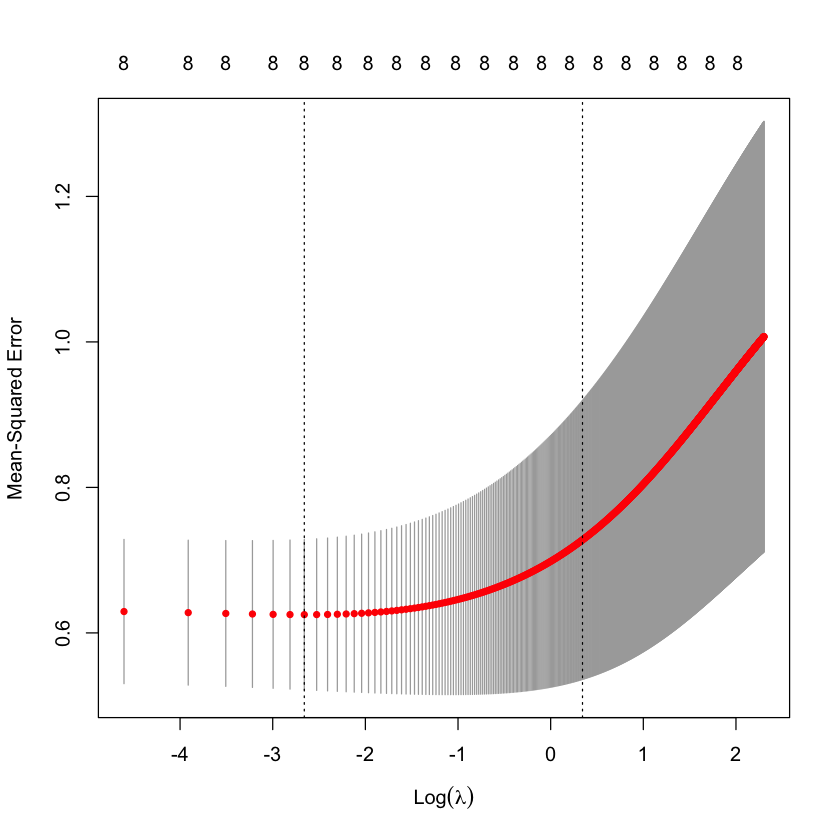

[1] "Lasso RMSE: 0.721793113459901"


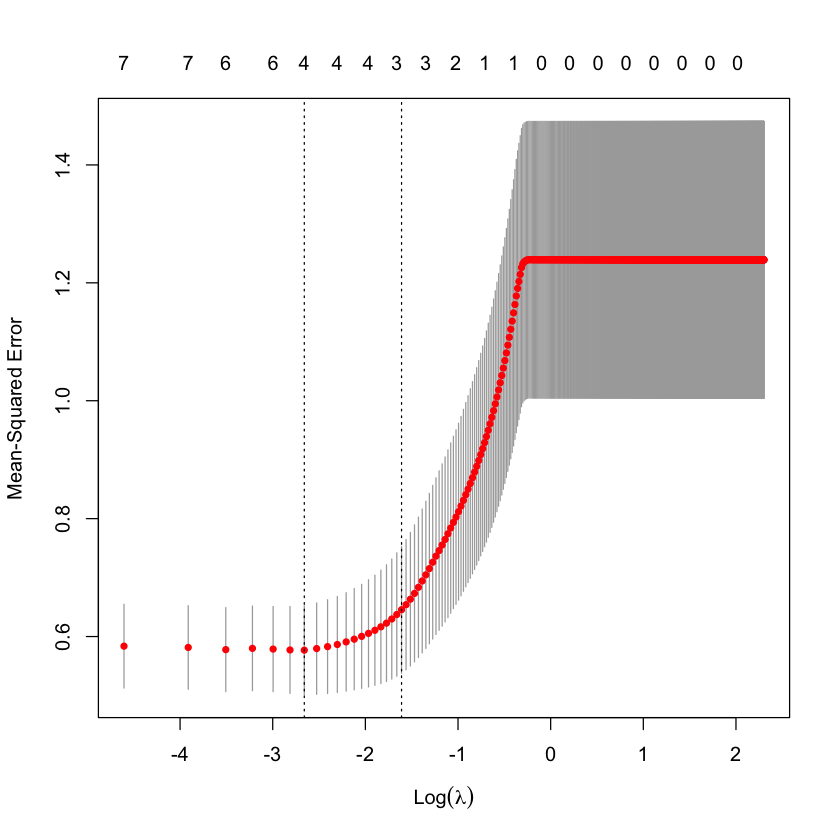

In [ ]:
# Importar las librerías necesarias
library(glmnet)
library(caret)

# Generar datos de ejemplo
library(Brq)
data(Prostate)
y <- Prostate$lpsa
x <- Prostate[,-9]

# Dividir los datos en conjuntos de entrenamiento y prueba
set.seed(123)
trainIndex <- createDataPartition(y, p = 0.80, list = FALSE, times = 1)
x_train <- x[trainIndex,]
x_test <- x[-trainIndex,]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

lam = seq(0, 10, by = 0.01)

# Ajustar el modelo de Regresión Ridge
ridge_model <- cv.glmnet(as.matrix(x_train), y_train, alpha = 0, lambda = lam)
plot(ridge_model)
ridge_best_lambda <- ridge_model$lambda.min

# Predecir y evaluar el modelo de Regresión Ridge
ridge_pred <- predict(ridge_model, s = ridge_best_lambda, newx = as.matrix(x_test))
ridge_rmse <- sqrt(mean((ridge_pred - y_test)^2))
print(paste("Ridge RMSE:", ridge_rmse))
print(paste("Ridge lambda:", ridge_best_lambda))

# Ajustar el modelo de Regresión Lasso
lasso_model <- cv.glmnet(as.matrix(x_train), y_train, alpha = 1, lambda = lam)
plot(lasso_model)
lasso_best_lambda <- lasso_model$lambda.min

# Predecir y evaluar el modelo de Regresión Lasso
lasso_pred <- predict(lasso_model, s = lasso_best_lambda, newx = as.matrix(x_test))
lasso_rmse <- sqrt(mean((lasso_pred - y_test)^2))
print(paste("Lasso RMSE:", lasso_rmse))

# Preparación de Datos
Carga y preprocesamiento de datos, incluyendo normalización y división en conjuntos de entrenamiento y prueba.

In [ ]:
# Cargar las librerías necesarias
library(glmnet)
library(caret)
library(dplyr)

# Generar datos de ejemplo
set.seed(123)
x <- matrix(rnorm(100*20), 100, 20)
y <- rnorm(100)

# Normalizar los datos
x <- scale(x)

# Dividir los datos en conjuntos de entrenamiento y prueba
set.seed(123)
trainIndex <- createDataPartition(y, p = .8, 
                                  list = FALSE, 
                                  times = 1)
x_train <- x[trainIndex,]
x_test <- x[-trainIndex,]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

# Regresión Ridge
Implementación de Ridge con diferentes valores de lambda, visualización de coeficientes y selección del mejor modelo.

In [ ]:
# Ajustar el modelo de Regresión Ridge con diferentes valores de lambda
ridge_model <- cv.glmnet(x_train, y_train, alpha = 0)

# Visualizar los coeficientes del modelo
plot(ridge_model)

# Seleccionar el mejor modelo basado en el valor de lambda óptimo
ridge_best_lambda <- ridge_model$lambda.min

# Predecir y evaluar el modelo de Regresión Ridge
ridge_pred <- predict(ridge_model, s = ridge_best_lambda, newx = x_test)
ridge_rmse <- sqrt(mean((ridge_pred - y_test)^2))
print(paste("Ridge RMSE:", ridge_rmse))

# Visualizar los coeficientes del mejor modelo
ridge_coefs <- coef(ridge_model, s = ridge_best_lambda)
print(ridge_coefs)

# Regresión Lasso
Implementación de Lasso, análisis de selección de variables y comparación con Ridge.

In [ ]:
# Ajustar el modelo de Regresión Lasso con diferentes valores de lambda
lasso_model <- cv.glmnet(x_train, y_train, alpha = 1)

# Visualizar los coeficientes del modelo
plot(lasso_model)

# Seleccionar el mejor modelo basado en el valor de lambda óptimo
lasso_best_lambda <- lasso_model$lambda.min

# Predecir y evaluar el modelo de Regresión Lasso
lasso_pred <- predict(lasso_model, s = lasso_best_lambda, newx = x_test)
lasso_rmse <- sqrt(mean((lasso_pred - y_test)^2))
print(paste("Lasso RMSE:", lasso_rmse))

# Visualizar los coeficientes del mejor modelo
lasso_coefs <- coef(lasso_model, s = lasso_best_lambda)
print(lasso_coefs)

# Comparar los coeficientes de Ridge y Lasso
comparison <- data.frame(
  Feature = rownames(ridge_coefs),
  Ridge = as.vector(ridge_coefs),
  Lasso = as.vector(lasso_coefs)
)
print(comparison)

# Notebook 2: Métodos Lineales para Clasificación
Implementación de métodos de clasificación lineal usando diferentes paquetes de R.

# Regresión Logística
Implementación de regresión logística, interpretación de coeficientes y evaluación del modelo.

In [15]:
# Cargar las librerías necesarias
library(glmnet)
library(caret)
library(dplyr)

# Generar datos de ejemplo
set.seed(123)
x <- matrix(rnorm(100*20), 100, 20)
y <- sample(c(0, 1), 100, replace = TRUE)

# Normalizar los datos
x <- scale(x)

# Dividir los datos en conjuntos de entrenamiento y prueba
set.seed(123)
trainIndex <- createDataPartition(y, p = .8, 
                                  list = FALSE, 
                                  times = 1)
x_train <- x[trainIndex,]
x_test <- x[-trainIndex,]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

# Ajustar el modelo de Regresión Logística
logistic_model <- glm(y_train ~ ., data = as.data.frame(x_train), family = binomial)

# Resumen del modelo
summary(logistic_model)

# Predecir y evaluar el modelo de Regresión Logística
logistic_pred <- predict(logistic_model, newdata = as.data.frame(x_test), type = "response")
logistic_pred_class <- ifelse(logistic_pred > 0.5, 1, 0)

# Matriz de confusión
confusion_matrix <- table(Predicted = logistic_pred_class, Actual = y_test)
print(confusion_matrix)

# Calcular la precisión del modelo
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Accuracy:", accuracy))


Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union





Call:
glm(formula = y_train ~ ., family = binomial, data = as.data.frame(x_train))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.37318    0.27843  -1.340   0.1801  
V1           0.14032    0.28548   0.492   0.6231  
V2          -0.03027    0.32328  -0.094   0.9254  
V3           0.15587    0.30901   0.504   0.6140  
V4           0.27412    0.31112   0.881   0.3783  
V5           0.69359    0.33276   2.084   0.0371 *
V6           0.13934    0.30812   0.452   0.6511  
V7          -0.00194    0.28590  -0.007   0.9946  
V8           0.38209    0.30471   1.254   0.2099  
V9           0.65970    0.32410   2.035   0.0418 *
V10          0.22334    0.33151   0.674   0.5005  
V11         -0.57168    0.36025  -1.587   0.1125  
V12         -0.21596    0.29624  -0.729   0.4660  
V13         -0.22867    0.29767  -0.768   0.4424  
V14          0.16340    0.32343   0.505   0.6134  
V15          0.57135    0.31527   1.812   0.0699 .
V16         -0.38577    0.32094  -

         Actual
Predicted  0  1
        0 10  6
        1  1  3
[1] "Accuracy: 0.65"


# Análisis Discriminante Lineal
Implementación de LDA, visualización de fronteras de decisión y comparación con regresión logística.


Adjuntando el paquete: 'MASS'


The following object is masked from 'package:dplyr':

    select




Call:
lda(y_train ~ ., data = as.data.frame(x_train))

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
          V1          V2
0 -0.1319437 -0.08006541
1  0.1821828  0.09471515

Coefficients of linear discriminants:
         LD1
V1 0.8818077
V2 0.4792544
         Actual
Predicted 0 1
        0 7 4
        1 3 6
[1] "LDA Accuracy: 0.65"
         Actual
Predicted 0 1
        0 7 4
        1 3 6
[1] "Logistic Regression Accuracy: 0.65"


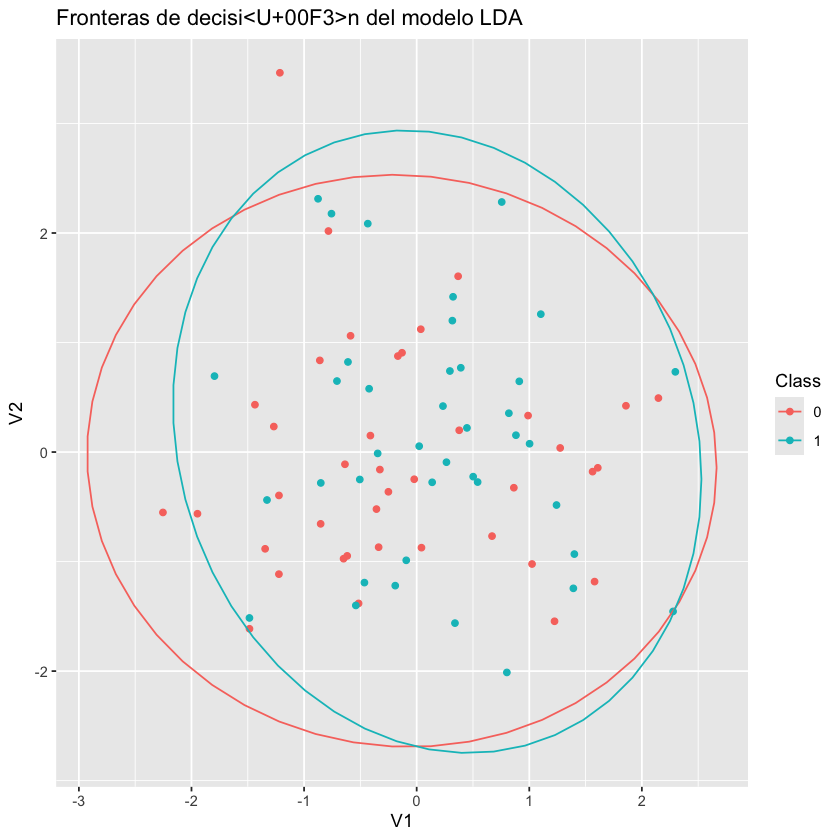

In [16]:
# Cargar las librerías necesarias
library(MASS)
library(ggplot2)

# Generar datos de ejemplo
set.seed(123)
x <- matrix(rnorm(100*2), 100, 2)
y <- sample(c(0, 1), 100, replace = TRUE)

# Normalizar los datos
x <- scale(x)

# Dividir los datos en conjuntos de entrenamiento y prueba
set.seed(123)
trainIndex <- createDataPartition(y, p = .8, 
                                  list = FALSE, 
                                  times = 1)
x_train <- x[trainIndex,]
x_test <- x[-trainIndex,]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

# Ajustar el modelo de Análisis Discriminante Lineal (LDA)
lda_model <- lda(y_train ~ ., data = as.data.frame(x_train))

# Resumen del modelo
print(lda_model)

# Predecir y evaluar el modelo de LDA
lda_pred <- predict(lda_model, newdata = as.data.frame(x_test))
lda_pred_class <- lda_pred$class

# Matriz de confusión
confusion_matrix_lda <- table(Predicted = lda_pred_class, Actual = y_test)
print(confusion_matrix_lda)

# Calcular la precisión del modelo LDA
accuracy_lda <- sum(diag(confusion_matrix_lda)) / sum(confusion_matrix_lda)
print(paste("LDA Accuracy:", accuracy_lda))

# Visualizar las fronteras de decisión
plot_data <- as.data.frame(x_train)
plot_data$Class <- as.factor(y_train)

ggplot(plot_data, aes(x = V1, y = V2, color = Class)) +
  geom_point() +
  stat_ellipse(type = "norm", level = 0.95) +
  labs(title = "Fronteras de decisión del modelo LDA")

# Comparar con Regresión Logística
logistic_model <- glm(y_train ~ ., data = as.data.frame(x_train), family = binomial)

# Predecir y evaluar el modelo de Regresión Logística
logistic_pred <- predict(logistic_model, newdata = as.data.frame(x_test), type = "response")
logistic_pred_class <- ifelse(logistic_pred > 0.5, 1, 0)

# Matriz de confusión
confusion_matrix_logistic <- table(Predicted = logistic_pred_class, Actual = y_test)
print(confusion_matrix_logistic)

# Calcular la precisión del modelo de Regresión Logística
accuracy_logistic <- sum(diag(confusion_matrix_logistic)) / sum(confusion_matrix_logistic)
print(paste("Logistic Regression Accuracy:", accuracy_logistic))

# Notebook 3: PCA
Análisis de Componentes Principales para reducción de dimensionalidad.

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.4308 1.35310 1.31993 1.20345 1.17158 1.13097 1.08622
Proportion of Variance 0.1023 0.09154 0.08711 0.07242 0.06863 0.06395 0.05899
Cumulative Proportion  0.1023 0.19390 0.28101 0.35342 0.42205 0.48601 0.54500
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     1.05594 1.02329 0.99431 0.93880 0.9165 0.86880 0.83581
Proportion of Variance 0.05575 0.05236 0.04943 0.04407 0.0420 0.03774 0.03493
Cumulative Proportion  0.60075 0.65311 0.70254 0.74661 0.7886 0.82635 0.86128
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.75195 0.74362 0.72770 0.66774 0.59060 0.57606
Proportion of Variance 0.02827 0.02765 0.02648 0.02229 0.01744 0.01659
Cumulative Proportion  0.88955 0.91720 0.94367 0.96597 0.98341 1.00000


Call:
lm(formula = y_train ~ ., data = as.data.frame(x_train_pca))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96326 -0.61553 -0.03664  0.60518  1.85758 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.129305   0.104621  -1.236   0.2214  
PC1          0.032620   0.073584   0.443   0.6592  
PC2         -0.053970   0.077807  -0.694   0.4906  
PC3         -0.040452   0.079762  -0.507   0.6139  
PC4          0.043651   0.087482   0.499   0.6197  
PC5         -0.200157   0.089862  -2.227   0.0297 *
PC6         -0.027544   0.093089  -0.296   0.7684  
PC7         -0.006068   0.096924  -0.063   0.9503  
PC8          0.021867   0.099704   0.219   0.8272  
PC9          0.038260   0.102885   0.372   0.7113  
PC10         0.085635   0.105884   0.809   0.4219  
PC11         0.083460   0.112144   0.744   0.4597  
PC12         0.028134   0.114873   0.245   0.8074  
PC13         0.138957   0.121179   1.147   0.2561  
PC14        -0.024908   0.125962 

[1] "Linear Regression with PCA RMSE: 0.900853499381855"
 (Intercept)          PC1          PC2          PC3          PC4          PC5 
-0.129304585  0.032620408 -0.053970483 -0.040451725  0.043651010 -0.200157024 
         PC6          PC7          PC8          PC9         PC10         PC11 
-0.027544214 -0.006067621  0.021867168  0.038260439  0.085635231  0.083460099 
        PC12         PC13         PC14         PC15         PC16         PC17 
 0.028133976  0.138957460 -0.024907579 -0.130462850  0.087189557  0.076700109 
        PC18         PC19         PC20 
 0.087324557  0.108484313 -0.026607036 


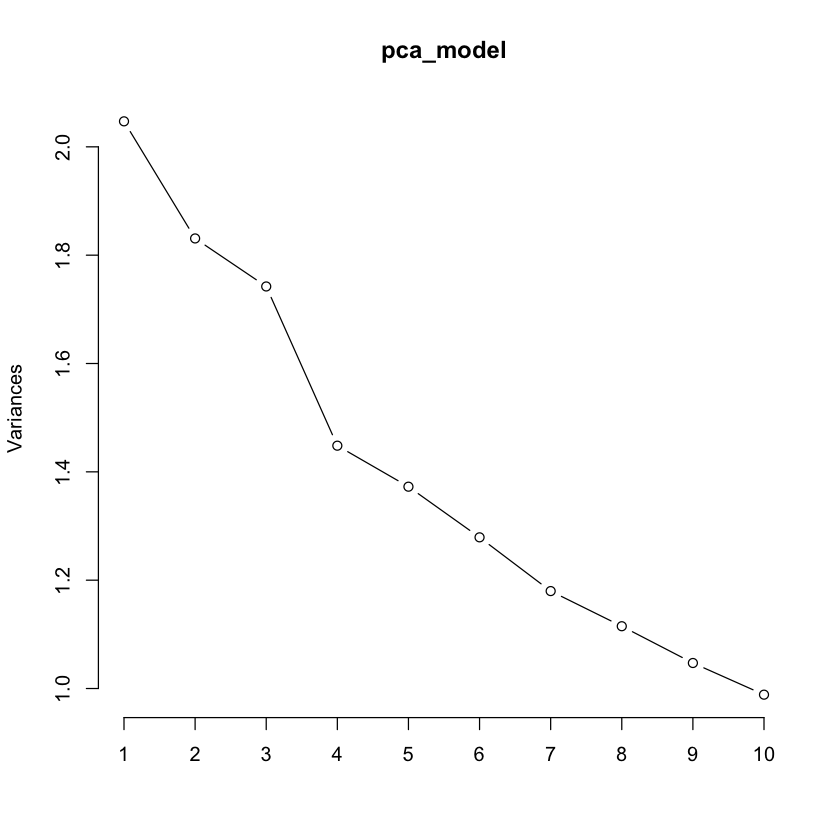

In [17]:
# Cargar las librerías necesarias
library(MASS)
library(ggplot2)

# Generar datos de ejemplo
set.seed(123)
x <- matrix(rnorm(100*20), 100, 20)
y <- rnorm(100)

# Normalizar los datos
x <- scale(x)

# Dividir los datos en conjuntos de entrenamiento y prueba
set.seed(123)
trainIndex <- createDataPartition(y, p = .8, 
                                  list = FALSE, 
                                  times = 1)
x_train <- x[trainIndex,]
x_test <- x[-trainIndex,]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

# Aplicar PCA para reducción de dimensionalidad
pca_model <- prcomp(x_train, center = TRUE, scale. = TRUE)

# Resumen del modelo PCA
summary(pca_model)

# Visualizar la varianza explicada por cada componente principal
plot(pca_model, type = "l")

# Transformar los datos de entrenamiento y prueba usando PCA
x_train_pca <- predict(pca_model, x_train)
x_test_pca <- predict(pca_model, x_test)

# Ajustar un modelo de regresión lineal usando los componentes principales
lm_model <- lm(y_train ~ ., data = as.data.frame(x_train_pca))

# Resumen del modelo de regresión lineal
summary(lm_model)

# Predecir y evaluar el modelo de regresión lineal
lm_pred <- predict(lm_model, newdata = as.data.frame(x_test_pca))
lm_rmse <- sqrt(mean((lm_pred - y_test)^2))
print(paste("Linear Regression with PCA RMSE:", lm_rmse))

# Visualizar los coeficientes del modelo de regresión lineal
print(coef(lm_model))

# Preparación de Datos PCA
Estandarización de datos y verificación de supuestos para PCA.

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.4308 1.35310 1.31993 1.20345 1.17158 1.13097 1.08622
Proportion of Variance 0.1023 0.09154 0.08711 0.07242 0.06863 0.06395 0.05899
Cumulative Proportion  0.1023 0.19390 0.28101 0.35342 0.42205 0.48601 0.54500
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     1.05594 1.02329 0.99431 0.93880 0.9165 0.86880 0.83581
Proportion of Variance 0.05575 0.05236 0.04943 0.04407 0.0420 0.03774 0.03493
Cumulative Proportion  0.60075 0.65311 0.70254 0.74661 0.7886 0.82635 0.86128
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.75195 0.74362 0.72770 0.66774 0.59060 0.57606
Proportion of Variance 0.02827 0.02765 0.02648 0.02229 0.01744 0.01659
Cumulative Proportion  0.88955 0.91720 0.94367 0.96597 0.98341 1.00000


Call:
lm(formula = y_train ~ ., data = as.data.frame(x_train_pca))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96326 -0.61553 -0.03664  0.60518  1.85758 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.129305   0.104621  -1.236   0.2214  
PC1          0.032620   0.073584   0.443   0.6592  
PC2         -0.053970   0.077807  -0.694   0.4906  
PC3         -0.040452   0.079762  -0.507   0.6139  
PC4          0.043651   0.087482   0.499   0.6197  
PC5         -0.200157   0.089862  -2.227   0.0297 *
PC6         -0.027544   0.093089  -0.296   0.7684  
PC7         -0.006068   0.096924  -0.063   0.9503  
PC8          0.021867   0.099704   0.219   0.8272  
PC9          0.038260   0.102885   0.372   0.7113  
PC10         0.085635   0.105884   0.809   0.4219  
PC11         0.083460   0.112144   0.744   0.4597  
PC12         0.028134   0.114873   0.245   0.8074  
PC13         0.138957   0.121179   1.147   0.2561  
PC14        -0.024908   0.125962 

[1] "Linear Regression with PCA RMSE: 0.900853499381855"
 (Intercept)          PC1          PC2          PC3          PC4          PC5 
-0.129304585  0.032620408 -0.053970483 -0.040451725  0.043651010 -0.200157024 
         PC6          PC7          PC8          PC9         PC10         PC11 
-0.027544214 -0.006067621  0.021867168  0.038260439  0.085635231  0.083460099 
        PC12         PC13         PC14         PC15         PC16         PC17 
 0.028133976  0.138957460 -0.024907579 -0.130462850  0.087189557  0.076700109 
        PC18         PC19         PC20 
 0.087324557  0.108484313 -0.026607036 


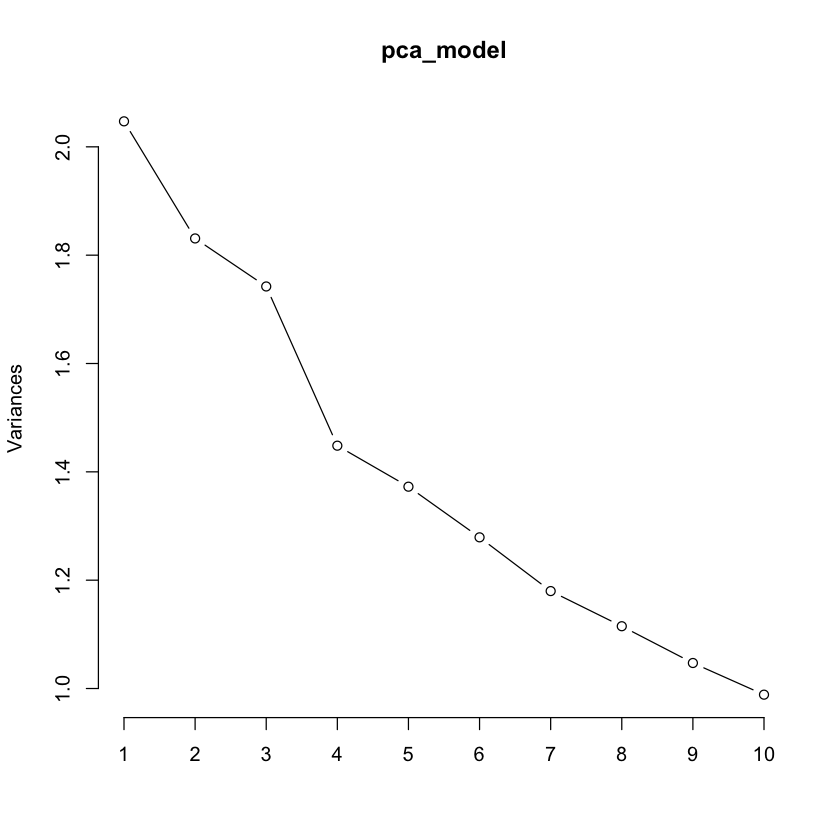

In [18]:
# Cargar las librerías necesarias
library(MASS)
library(ggplot2)

# Generar datos de ejemplo
set.seed(123)
x <- matrix(rnorm(100*20), 100, 20)
y <- rnorm(100)

# Normalizar los datos
x <- scale(x)

# Dividir los datos en conjuntos de entrenamiento y prueba
set.seed(123)
trainIndex <- createDataPartition(y, p = .8, 
                                  list = FALSE, 
                                  times = 1)
x_train <- x[trainIndex,]
x_test <- x[-trainIndex,]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

# Aplicar PCA para reducción de dimensionalidad
pca_model <- prcomp(x_train, center = TRUE, scale. = TRUE)

# Resumen del modelo PCA
summary(pca_model)

# Visualizar la varianza explicada por cada componente principal
plot(pca_model, type = "l")

# Transformar los datos de entrenamiento y prueba usando PCA
x_train_pca <- predict(pca_model, x_train)
x_test_pca <- predict(pca_model, x_test)

# Ajustar un modelo de regresión lineal usando los componentes principales
lm_model <- lm(y_train ~ ., data = as.data.frame(x_train_pca))

# Resumen del modelo de regresión lineal
summary(lm_model)

# Predecir y evaluar el modelo de regresión lineal
lm_pred <- predict(lm_model, newdata = as.data.frame(x_test_pca))
lm_rmse <- sqrt(mean((lm_pred - y_test)^2))
print(paste("Linear Regression with PCA RMSE:", lm_rmse))

# Visualizar los coeficientes del modelo de regresión lineal
print(coef(lm_model))

# Aplicación de PCA
Cálculo de componentes principales, análisis de varianza explicada y rotación de componentes.

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.4308 1.35310 1.31993 1.20345 1.17158 1.13097 1.08622
Proportion of Variance 0.1023 0.09154 0.08711 0.07242 0.06863 0.06395 0.05899
Cumulative Proportion  0.1023 0.19390 0.28101 0.35342 0.42205 0.48601 0.54500
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     1.05594 1.02329 0.99431 0.93880 0.9165 0.86880 0.83581
Proportion of Variance 0.05575 0.05236 0.04943 0.04407 0.0420 0.03774 0.03493
Cumulative Proportion  0.60075 0.65311 0.70254 0.74661 0.7886 0.82635 0.86128
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.75195 0.74362 0.72770 0.66774 0.59060 0.57606
Proportion of Variance 0.02827 0.02765 0.02648 0.02229 0.01744 0.01659
Cumulative Proportion  0.88955 0.91720 0.94367 0.96597 0.98341 1.00000


Call:
lm(formula = y_train ~ ., data = as.data.frame(x_train_pca))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96326 -0.61553 -0.03664  0.60518  1.85758 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.129305   0.104621  -1.236   0.2214  
PC1          0.032620   0.073584   0.443   0.6592  
PC2         -0.053970   0.077807  -0.694   0.4906  
PC3         -0.040452   0.079762  -0.507   0.6139  
PC4          0.043651   0.087482   0.499   0.6197  
PC5         -0.200157   0.089862  -2.227   0.0297 *
PC6         -0.027544   0.093089  -0.296   0.7684  
PC7         -0.006068   0.096924  -0.063   0.9503  
PC8          0.021867   0.099704   0.219   0.8272  
PC9          0.038260   0.102885   0.372   0.7113  
PC10         0.085635   0.105884   0.809   0.4219  
PC11         0.083460   0.112144   0.744   0.4597  
PC12         0.028134   0.114873   0.245   0.8074  
PC13         0.138957   0.121179   1.147   0.2561  
PC14        -0.024908   0.125962 

[1] "Linear Regression with PCA RMSE: 0.900853499381855"
 (Intercept)          PC1          PC2          PC3          PC4          PC5 
-0.129304585  0.032620408 -0.053970483 -0.040451725  0.043651010 -0.200157024 
         PC6          PC7          PC8          PC9         PC10         PC11 
-0.027544214 -0.006067621  0.021867168  0.038260439  0.085635231  0.083460099 
        PC12         PC13         PC14         PC15         PC16         PC17 
 0.028133976  0.138957460 -0.024907579 -0.130462850  0.087189557  0.076700109 
        PC18         PC19         PC20 
 0.087324557  0.108484313 -0.026607036 


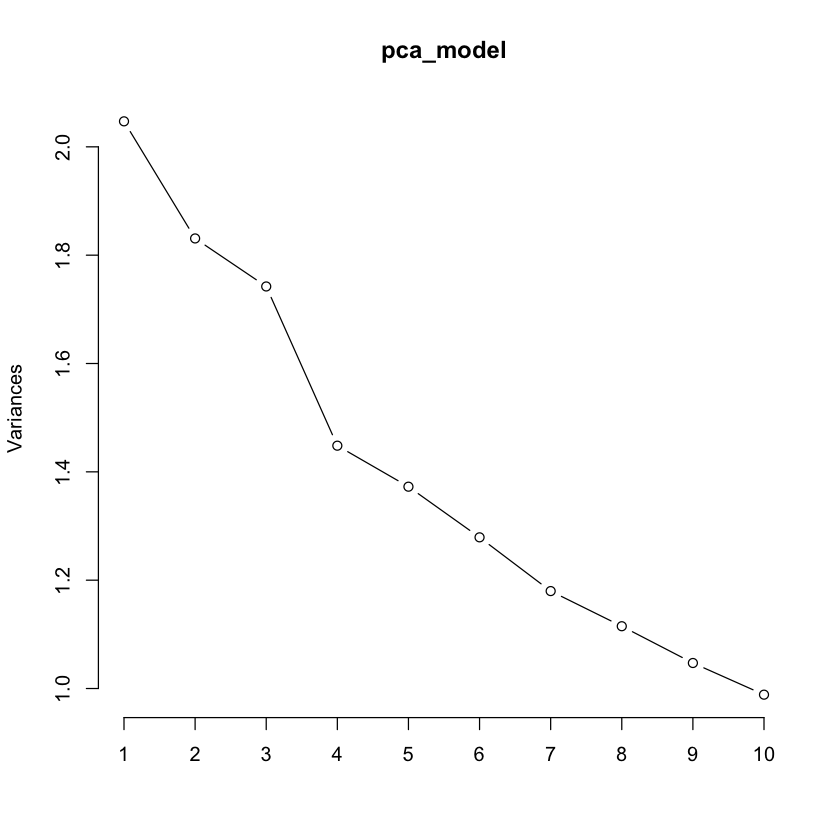

In [19]:
# Cargar las librerías necesarias
library(MASS)
library(ggplot2)

# Generar datos de ejemplo
set.seed(123)
x <- matrix(rnorm(100*20), 100, 20)
y <- rnorm(100)

# Normalizar los datos
x <- scale(x)

# Dividir los datos en conjuntos de entrenamiento y prueba
set.seed(123)
trainIndex <- createDataPartition(y, p = .8, 
                                  list = FALSE, 
                                  times = 1)
x_train <- x[trainIndex,]
x_test <- x[-trainIndex,]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

# Aplicar PCA para reducción de dimensionalidad
pca_model <- prcomp(x_train, center = TRUE, scale. = TRUE)

# Resumen del modelo PCA
summary(pca_model)

# Visualizar la varianza explicada por cada componente principal
plot(pca_model, type = "l")

# Transformar los datos de entrenamiento y prueba usando PCA
x_train_pca <- predict(pca_model, x_train)
x_test_pca <- predict(pca_model, x_test)

# Ajustar un modelo de regresión lineal usando los componentes principales
lm_model <- lm(y_train ~ ., data = as.data.frame(x_train_pca))

# Resumen del modelo de regresión lineal
summary(lm_model)

# Predecir y evaluar el modelo de regresión lineal
lm_pred <- predict(lm_model, newdata = as.data.frame(x_test_pca))
lm_rmse <- sqrt(mean((lm_pred - y_test)^2))
print(paste("Linear Regression with PCA RMSE:", lm_rmse))

# Visualizar los coeficientes del modelo de regresión lineal
print(coef(lm_model))

# Visualización de Componentes
Gráficos de sedimentación, biplots y mapas de calor para interpretación de resultados.

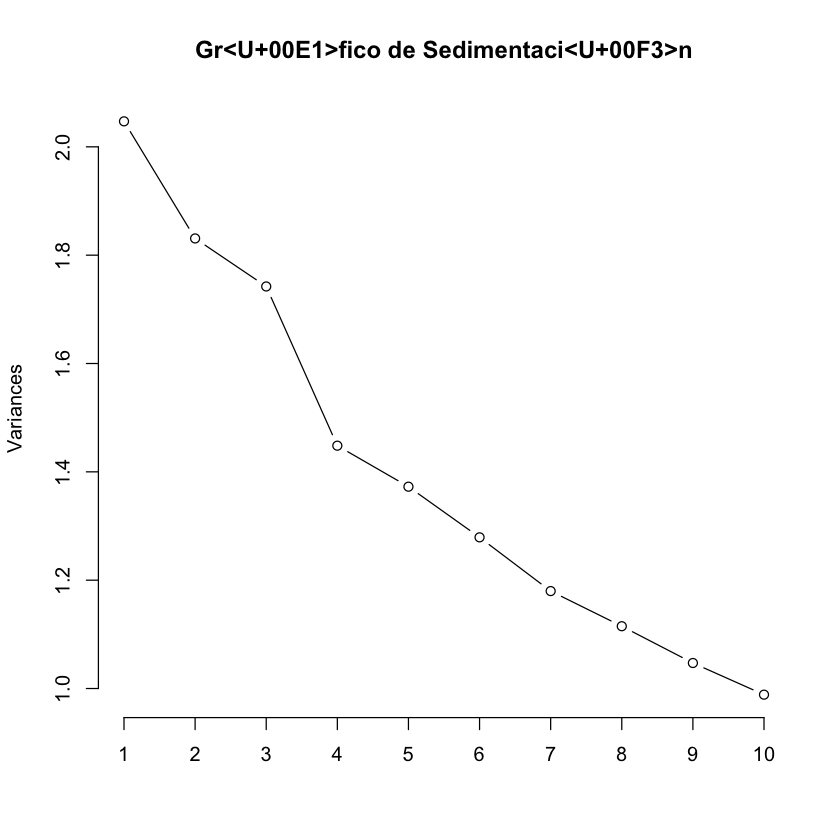

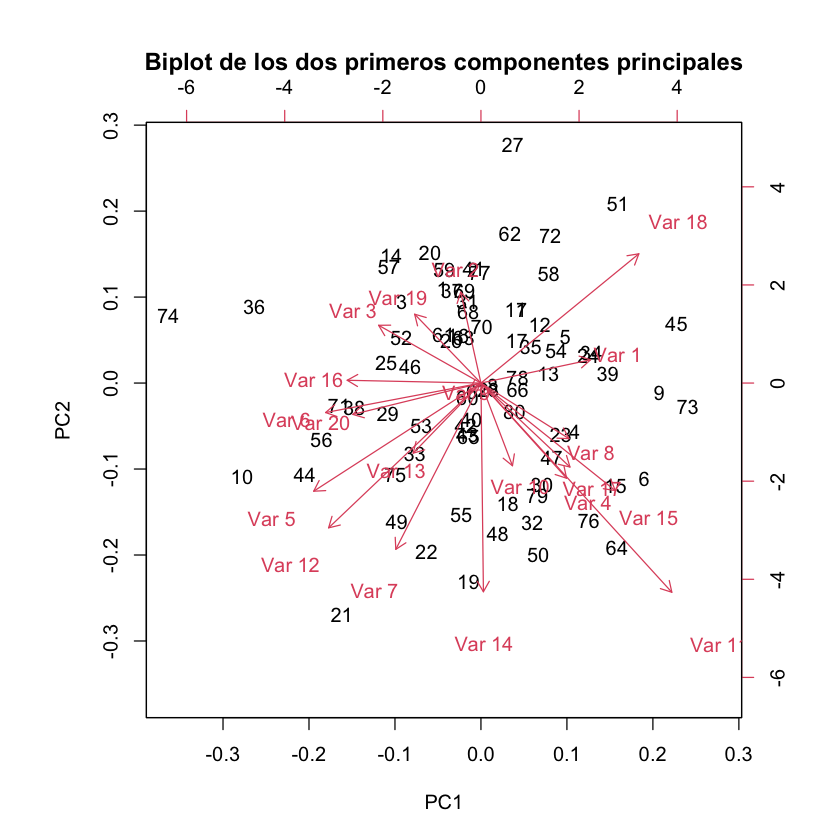

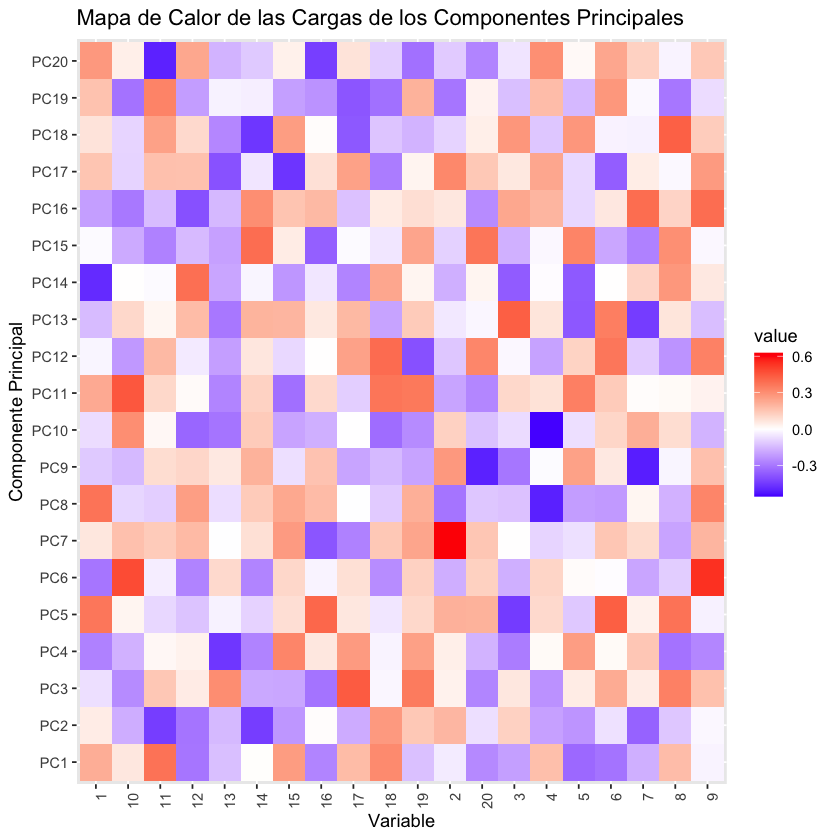

In [20]:
# Cargar las librerías necesarias para visualización
library(ggplot2)
library(reshape2)

# Gráfico de sedimentación
plot(pca_model, type = "l", main = "Gráfico de Sedimentación")

# Biplot de los dos primeros componentes principales
biplot(pca_model, main = "Biplot de los dos primeros componentes principales")

# Crear un mapa de calor de las cargas de los componentes principales
pca_loadings <- as.data.frame(pca_model$rotation)
pca_loadings$Variable <- rownames(pca_loadings)
pca_loadings_melt <- melt(pca_loadings, id.vars = "Variable")

ggplot(pca_loadings_melt, aes(x = Variable, y = variable, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Mapa de Calor de las Cargas de los Componentes Principales", x = "Variable", y = "Componente Principal")

### Hitters

In [ ]:
# Cárganse os datos e imprímese diversa información sobre eles
library(ISLR)
data(Hitters)
head(Hitters)
help(Hitters)

# Eliminación das covariables non numéricas e observacións con NA
Hitters2 <- Hitters[,-c(14,15,20)]
Hitters2 <- na.omit(Hitters2)
dim(Hitters2)

# División en conxunto de adestramento e proba
Hitters_train <- Hitters2[1:200,]
Hitters_test <- Hitters2[201:263,]

###############################################################

# REGRESIÓN LINEAL MÚLTIPLE
# Axuste
mul_lin <- lm(Salary ~ ., data = Hitters_train)
# Predición
mul_lin_pred <- predict(mul_lin, newdata = Hitters_test)
# Suma de residuos ao cadrado
sum((mul_lin_pred - Hitters_test$Salary)^2)

###############################################################

# Regresión Ridge
library(glmnet)
x_train <- Hitters_train[,-17]
y_train <- Hitters_train$Salary
x_test <- Hitters_test[,-17]
lam_values <- seq(0, 10, by = 0.01)

ridge <- glmnet(x_train, y_train, alpha = 0, lambda = lam_values)
ridge_cvout <- cv.glmnet(as.matrix(x_train), y_train, alpha = 0, lambda = lam_values)
ridge_lam_min <- ridge_cvout$lambda.min
coef(ridge_cvout, s = "lambda.min")
ridge_pred <- predict(ridge, newx = as.matrix(x_test), type = "response", s = ridge_lam_min)
sum((ridge_pred - Hitters_test$Salary)^2)


###############################################################

# Regresión Lasso
lasso <- glmnet(x_train, y_train, alpha = 1, lambda = lam_values)
lasso_cvout <- cv.glmnet(as.matrix(x_train), y_train, alpha = 1, lambda = lam_values)
lasso_lam_min <- lasso_cvout$lambda.min
coef(lasso_cvout, s = "lambda.min")
lasso_pred <- predict(lasso, newx = as.matrix(x_test), type = "response", s = lasso_lam_min)
sum((lasso_pred - Hitters_test$Salary)^2)


# RESPOSTA
# Os valores de lambda elíxense realizando unha validación cruzada con k=10 e collendo aquel lambda para o cal
# se obtén unha maior predición.
# Pódese observar como o modelo que menos erro de suma de residuos ao cadrado ten é o de regresión Ridge
# Con Lasso poderíanse eliminar 2 covariables: Runs e CHits

### Test

In [ ]:
# ============================================================
# Test 2021
# ============================================================


# Cárganse as librerías
library('ISLR')
library('glmnet')

# Divídese o conxunto de datos en adestramento e proba
train_auto <- Auto[1:300, ]
test_auto <- Auto[301:392, ]

# Créase o modelo de regresión lineal
lm_model <- lm(mpg ~ cylinders + displacement + horsepower + weight, data = train_auto)


# ============================================================


# 1. ¿Qué predictores son estadísticamente significativos?

summary(lm_model)

# Pódese apreciar no resumo os p-valores de cada un dos 
# preditores así como do termo independente. Un nivel posible
# de significancia é ter un p-valor < 0,05 (columna 'Pr(>|t|)').
# Con esta premisa, os preditores estatisticamente significativos
# son 'horsepower' e 'weight', a maiores do termo independente.


# ============================================================


# 2. Calcula el error cuadrático medio (MSE) para la muestra de 
# entrenamiento y la muestra test obtenidos con el ajuste lineal.

train_mse <- sum(lm_model$residuals^2) / nrow(train_auto)
train_mse

preds <- predict(lm_model, newdata = test_auto)
test_mse <- sum((test_auto$mpg - preds)^2) / nrow(test_auto)
test_mse


# ============================================================


# 3. ¿Cuáles son los coeficientes estimados al ajustar un modelo de regresión 
# a la muestra de entrenamiento con regularización Lasso usando
# lambda = 3. Calcula el error cuadrático medio (MSE) para la muestra test.

train_auto_x <- train_auto[, c('cylinders', 'displacement', 'horsepower', 'weight')]
train_auto_y <- train_auto$mpg
test_auto_x <- test_auto[, c('cylinders', 'displacement', 'horsepower', 'weight')]
test_auto_y <- test_auto$mpg

lasso_model <- glmnet(train_auto_x, train_auto_y, alpha = 1, lambda = 3)
coef(lasso_model)

preds <- predict(lasso_model, newx = as.matrix(test_auto_x))
test_mse <- sum((test_auto_y - preds)^2) / nrow(test_auto)
test_mse


# ============================================================

# 4. Al ajustar un modelo de regresión con regularización Lasso, ¿en qué 
# orden se hacen cero los coeficientes del modelo ajustado al incrementar 
# el valor de la penalización lambda

lasso_model2 <- glmnet(train_auto_x, train_auto_y, alpha = 1)
plot(lasso_model2, xvar = 'lambda', col = 1:ncol(coef(lasso_model2)), lwd = 2)
legend('topleft', legend = colnames(train_auto_x), col = 1:ncol(coef(lasso_model2)), lwd = 2)

# A orde na que se fan primeiro 0 é:
#   1. cylinders
#   2. horsepower
#   3. displacement
#   4. weight

In [ ]:
#La base de datos de Hitters de la librería ISLR, contiene el sario (en miles de dólares) 322 jugadores de béibol en 1987(Salary).
# Ademas  se han medido otras caracteristicas de cada jugadr help(Hitters). Utiñizando todsas las covariables numericas y asumiendo commo continues ,
#es decir , tosdas menos 14 league, la  15 division y la 20 newleague , 
# ajusta los siguientesa modelos que permiten predecir el salaru en funcion de las otras cavriables
# lieneal múltiple, Ridge y Lasso. En los dos ultimos casos mencione que valor de penalización lamda  has empleado e indica si los modelo te permitne eliminar 
# alguna covarible

#primero elimia todas las obsevacionen con algun NAN y llyego utiliza como conjunto de entranmiento las 200 primeras
# restos de observacicones como conjunto de test
# para ver que modelo proporcione en ete caso el mejor ajuste en terminos de la suma de residuos al cuadrado


install.packages("ISLR")
library(ISLR)
data("Hitters")
Hitters2<-Hitters[,-c(14,15,20)]
# eliminamos los nan
Hitters2_2 <- na.omit(Hitters2)
help(Hitters)
Hitters2_2_train<Hitters2_2[1:200,]
Hitters2_2_test<-Hitters2_2[200:length(x),]
# Regresión Lineal Múltiple
# Se ajusta un modelo lineal para explicar la variable 'salary' usando todas las otras variables como predictoras.

model <- lm(Hitters2_2$Salary ~ ., data =  Hitters2_2) # Ajustar modelo
summary(model)

# Regresión Ridge
# Ridge es una técnica de regularización que añade un término de penalización a la suma de los cuadrados de los coeficientes.
# Esto ayuda a prevenir el sobreajuste, especialmente cuando las variables predictoras están correlacionadas.
library(MASS) # Biblioteca para regresión Ridge
lam <- seq(0, 100, by = 0.01) # Secuencia de valores lambda para la penalización
rr <- lm.ridge(Hitters2_2$Salary ~ ., lambda = lam,data = Hitters2_2)
coef(rr) # Coeficientes para diferentes lambdas
plot(rr, xvar = "lambda")
# Regresión Ridge con glmnet
# glmnet es otra biblioteca que ofrece una implementación eficiente de regresión Ridge y Lasso.
library(glmnet) # Biblioteca para glmnet
x <- Hitters2_2_train[1, ] # Variables predictoras
y <- Hitters2_2_train$Salary # Variable de respuesta
rr_glmnet <- glmnet(x, y, alpha = 0, lambda = lam) # Ajustar modelo Ridge con glmnet
coef(rr_glmnet) # Mostrar coeficientes
plot(rr_glmnet, xvar = "lambda")
# Estimación Lasso
# Lasso es similar a Ridge, pero puede reducir algunos coeficientes a cero, lo que implica selección de variables.
lam <- seq(0, 1000, by = 0.01) # Secuencia de valores lambda para la penalización
lasso <- glmnet(x, y, alpha = 1, lambda = lam) # Ajustar modelo Lasso
coef(lasso) # Mostrar coeficientes
plot(lasso, xvar = "lambda")

lasso <- glmnet(x, y, alpha = 1, lambda = lam) # Ajustar modelo Lasso
coef(lasso) # Mostrar coeficientes
plot(lasso, xvar = "lambda")
# Selección del parámetro de penalización mediante validación cruzada
# La validación cruzada se usa para seleccionar el mejor valor de lambda que minimiza el error de predicción.
cvout <- cv.glmnet(as.matrix(x), y, alpha = 0, lambda = lam) # Validación cruzada para Ridge
coef(cvout, s = "lambda.min") # Coeficientes para el lambda óptimo en Ridge

cvout2 <- cv.glmnet(as.matrix(x), y, alpha = 1, lambda = lam) # Validación cruzada para Lasso
coef(cvout2, s = "lambda.min") # Coeficientes para el lambda óptimo en Lasso

# Predicción con Lasso
# Ejemplo de cómo hacer predicciones para las primeras 5 observaciones con un valor específico de lambda.
testx<-Hitters2_2_test[, -1]
predict(lasso, newx = as.matrix(x[200:length(x), ]), type = "response", s = 0.5)

# segun lasso para una lambda 6 somos capaz de eliminar una variable por lo que podria ser interesante 
predict(lasso, newx = as.matrix(x[200:length(x), ]), type = "response", s = 6)
predict(rr_glmnet, newx = as.matrix(x[200:length(x), ]), type = "response", s = 0.5)


p <- 100
trainx <- Hitters2_2_train[, 1:p]
pca <- princomp(trainx)
summary(pca)
screeplot(pca, type = "lines")


#--------

# Instalar y cargar la librería "ISLR" si aún no está instalada
if (!require(ISLR)) {
  install.packages("ISLR")
  library(ISLR)
}

# Cargar los datos de Hitters
data("Hitters")

# Eliminar observaciones con NaN
Hitters <- na.omit(Hitters)

# Separar las covariables numéricas y la variable objetivo "Salary"
X <- Hitters[, -c(14, 15, 20)]  # Excluye las columnas league, division y newleague
y <- Hitters$Salary

# Dividir los datos en conjunto de entrenamiento (200 primeras observaciones) y conjunto de prueba (restantes)
set.seed(42)  # Semilla para reproducibilidad
train_idx <- sample(1:nrow(X), 200)
X_train <- X[train_idx, ]
y_train <- y[train_idx]
X_test <- X[-train_idx, ]
y_test <- y[-train_idx]

# Ajustar modelo de regresión lineal múltiple
linear_model <- lm(Salary ~ ., data = data.frame(Salary = y_train, X_train))

# Ajustar modelo Ridge con un valor de penalización lambda (alpha) específico
library(glmnet)
alpha_ridge <- 1.0  # Puedes ajustar el valor de alpha según lo desees
ridge_model <- glmnet(X_train, y_train, alpha = alpha_ridge)

# Ajustar modelo Lasso con un valor de penalización lambda (alpha) específico
alpha_lasso <- 1.0  # Puedes ajustar el valor de alpha según lo desees
lasso_model <- glmnet(X_train, y_train, alpha = alpha_lasso)

# Evaluar los modelos en términos de RSS en el conjunto de prueba
linear_predictions <- predict(linear_model, newdata = data.frame(X_test))
ridge_predictions <- predict(ridge_model, newx = as.matrix(X_test))
lasso_predictions <- predict(lasso_model, newx = as.matrix(X_test))

# Calcular RSS para cada modelo
RSS_linear <- sum((y_test - linear_predictions)^2)
RSS_ridge <- sum((y_test - ridge_predictions)^2)
RSS_lasso <- sum((y_test - lasso_predictions)^2)

# Imprimir los RSS de cada modelo
cat("RSS del modelo lineal:", RSS_linear, "\n")
cat("RSS del modelo Ridge:", RSS_ridge, "\n")
cat("RSS del modelo Lasso:", RSS_lasso, "\n")


#Para realizar la reducción dimensional en R utilizando PCA (Análisis de Componentes Principales) y otros métodos como LDA (Análisis Discriminante Lineal), puedes seguir estos pasos:

#Primero, asegúrate de tener las librerías necesarias instaladas. Utilizaré las librerías caret, e1071, y MASS para PCA y LDA:

#R

if (!require(caret)) {
  install.packages("caret")
  library(caret)
}

if (!require(e1071)) {
  install.packages("e1071")
  library(e1071)
}

if (!require(MASS)) {
  install.packages("MASS")
  library(MASS)
}

#Ahora, puedes realizar la reducción dimensional con PCA y LDA:

#PCA (Análisis de Componentes Principales):

#R

# Estandarizar las covariables antes de aplicar PCA
scaled_X_train <- scale(X_train)

# Realizar PCA
pca_model <- prcomp(scaled_X_train, center = TRUE, scale. = TRUE)

# Verificar la proporción de varianza explicada por cada componente
prop_var <- pca_model$sdev^2 / sum(pca_model$sdev^2)

# Graficar la proporción de varianza explicada acumulativa
cumulative_prop_var <- cumsum(prop_var)
plot(cumulative_prop_var, type = "b", xlab = "Número de Componentes", ylab = "Proporción de Varianza Explicada Acumulativa")

# Seleccionar el número de componentes principales deseado
num_components <- 5  # Puedes ajustar este valor según tus necesidades

# Reducir dimensionalidad con PCA
reduced_X_train_pca <- predict(pca_model, newdata = scaled_X_train)[, 1:num_components]

# Aplicar la misma reducción a los datos de prueba
scaled_X_test <- scale(X_test)
reduced_X_test_pca <- predict(pca_model, newdata = scaled_X_test)[, 1:num_components]

#LDA (Análisis Discriminante Lineal):

#R

# Ajustar modelo LDA
lda_model <- lda(Salary ~ ., data = data.frame(Salary = y_train, reduced_X_train_pca))

# Reducir dimensionalidad con LDA
reduced_X_train_lda <- predict(lda_model, newdata = data.frame(Salary = y_train, reduced_X_train_pca))$x

# Aplicar la misma reducción a los datos de prueba
reduced_X_test_lda <- predict(lda_model, newdata = data.frame(Salary = y_train, reduced_X_test_pca))$x

#Ahora tienes reducciones dimensionales de los datos utilizando PCA y LDA.
#puedes utilizar estos conjuntos de datos reducidos en lugar de las covariables 
#originales para ajustar y evaluar modelos de regresión o cualquier otro análisis
#posterior que desees realizar. Asegúrate de ajustar tus modelos y r
#realizar evaluaciones utilizando estos conjuntos de datos reducidos en lugar de las covariables originales.

In [ ]:
# Ejercio 2
# Punto inicial
tk=c(2,1)
# paso
t=0.1

# -gradeinte de f
deltax=function(x,y){-c(2*x,2*y)}

# Iterando 

#dir=deltax(tk[1],tk[2])
#tk=tk+t*dir

# ahora hacemos un bucle con iteraciones
max_iterations <-1
for (iteration in 1:max_iterations) {
  dir=deltax(tk[1],tk[2])
  tk=tk+t*dir
}
tk
# Ejercicio 3
install.packages("ISLR")
library(ISLR)
library(ggplot2)
data("mtcars")
# Visualizamos los datos para entender la relación entre mpg (millas por galón) y wt (peso del coche)
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point() + geom_smooth(method="lm", se=FALSE)
mtcart_2 <- na.omit(mtcars)
#selecionamos las columnas
mtcart_3 <-mtcart_2[, c("mpg","disp", "hp", "drat", "wt","qsec")]
summary(mtcars)
x <- mtcart_3[,c("disp", "hp", "drat", "wt","qsec")] # Variables predictoras
y <- mtcart_3$mpg # Variable de respuesta
rr_glmnet <- glmnet(x, y, alpha = 0, lambda = lam) # Ajustar modelo Ridge con glmnet

# Estimación Lasso
library(glmnet) # Biblioteca para glmnet
# Lasso es similar a Ridge, pero puede reducir algunos coeficientes a cero, lo que implica selección de variables.
lam <- seq(0, 10, by = 0.01) # Secuencia de valores lambda para la penalización
lasso <- glmnet(x, y, alpha = 1, lambda = lam) # Ajustar modelo Lasso
coef(lasso) # Mostrar coeficientes
plot(lasso, xvar = "lambda")
# como podemos observar con un lambda igual a 0 podemos eliminar todas las varibles menos 2 
summary(lasso)

lasso <- glmnet(x, y, alpha = 1, lambda = 3) # Ajustar modelo Lasso
coef(lasso) # Mostrar coeficientes
# por lo que se puden descarte drat y qsec
lasso <- glmnet(x, y, alpha = 1, lambda = 1) # Ajustar modelo Lasso
coef(lasso) # Mostrar coeficientes
# por lo que se puden descarte drat y qsec

lasso <- glmnet(x, y, alpha = 1, lambda = 4) # Ajustar modelo Lasso
coef(lasso) # Mostrar coeficientes

# Ejercicio 4
mtcart_2 <- na.omit(mtcars)
mtcart_reduce <-mtcart_2[, c("mpg","drat", "wt", "vs")]


library(MASS)
lda.fit <- lda(mtcart_reduce$vs ~ ., data = mtcart_reduce)

# se calcula con proporciones muestrales
lda.fit$prior
table(mtcart_reduce$mpg)/length(mtcart_reduce$mpg)

# Dentro de cada subgrupo se ajusta una normal de medias 
lda.fit$means

# Predicci�n en observaciones originales
lda.pred2 <- predict(lda.fit)
mtcart_reduce$vs
# Comparamos con la realidad
table(lda.pred2$class, mtcart_reduce$vs)
# Vemos que el porcentaje mal clasificado clasificados es
mean(lda.pred2$class!= mtcart_reduce$vs)
# clasifica bien la clase 0 17/18
# clasifica mal la clase 1 5/14

# Utilizando An�lisis Cuadr�tico Discriminante
qda.fit <- qda(mtcart_reduce$vs ~ ., data = mtcart_reduce)

# Predicci�n para los valores observados
qda.pred <- predict(qda.fit)

# Comparamos con la realidad
table(qda.pred$class, mtcart_reduce$vs)
# clasifica bien la clase 0 17/18
# clasifica mal la clase 1 4/14

# En este caso en an�lisis predictivo es mejor
# tasa mal clasificada
mean(qda.pred$class!= mtcart_reduce$vs)

# b 
mtcart_reduce_2 <-mtcart_2[, c("mpg","disp", "hp", "vs")]
lda.fit <- lda(mtcart_reduce_2$vs ~ ., data = mtcart_reduce_2)

# se calcula con proporciones muestrales
lda.fit$prior
table(mtcart_reduce_2$vs)/length(mtcart_reduce_2$vs)

# Dentro de cada subgrupo se ajusta una normal de medias 
lda.fit$means

# Predicci�n en observaciones originales
lda.pred2 <- predict(lda.fit)

# Comparamos con la realidad
table(lda.pred2$class, mtcart_reduce_2$vs)
# Vemos que el porcentaje de bien clasificados es
mean(lda.pred2$class== mtcart_reduce_2$vs)


# En este caso tiene un mejor comportamiento usar qsec y drat ya que 
# en laso comprobamos que se explicaban menos la variable mpg
mtcart_reduce_3 <-mtcart_2[, c("mpg","qsec", "drat", "vs")]
lda.fit <- lda(mtcart_reduce_3$vs ~ ., data = mtcart_reduce_3)

# se calcula con proporciones muestrales
lda.fit$prior
table(mtcart_reduce_3$vs)/length(mtcart_reduce_3$vs)

# Dentro de cada subgrupo se ajusta una normal de medias 
lda.fit$means

# Predicci�n en observaciones originales
lda.pred2 <- predict(lda.fit)

# Comparamos con la realidad
table(lda.pred2$class, mtcart_reduce_3$vs)
# Vemos que el porcentaje de bien clasificados es
mean(lda.pred2$class== mtcart_reduce_3$vs)

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
else if (condition) {
    BiocManager::install("Biobase")
   selected
}
else {
    selected
}